In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, uniform
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler,MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN


drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/data_analytic/loan_data.csv"

df= pd.read_csv(path,sep=",")

In [ ]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [ ]:
# ubah data type kolom 'credit.policy' dan 'not.fully.paid' menjadi boolean
df['credit.policy'] = df['credit.policy'].astype(bool)
df['not.fully.paid'] = df['not.fully.paid'].astype(bool)


print(df[['credit.policy', 'not.fully.paid']].dtypes)

credit.policy     bool
not.fully.paid    bool
dtype: object


In [ ]:
dupli_sum = df.duplicated().sum()
print(dupli_sum)

0


In [ ]:
pd.isna(df).sum()
# df.isnull().sum()


credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

<Axes: ylabel='credit.policy'>

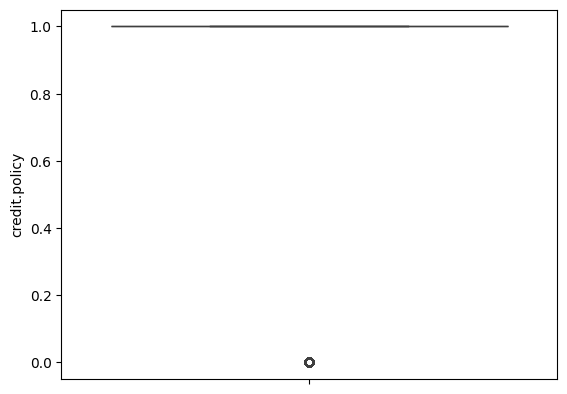

In [ ]:
sns.boxplot(df['credit.policy'])

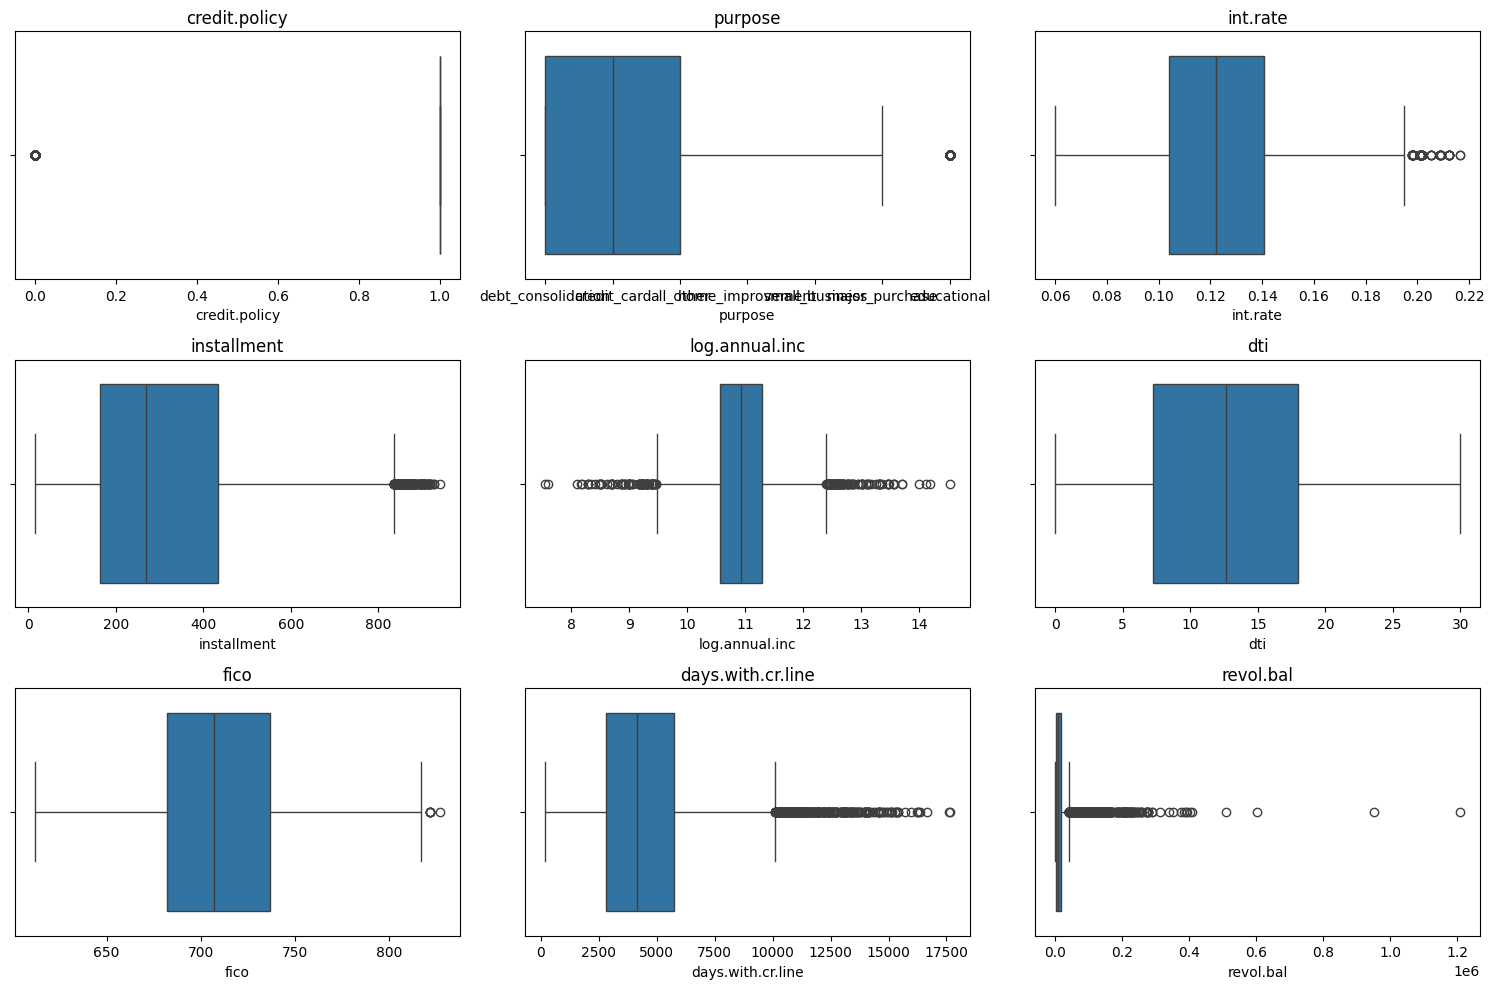

In [ ]:

import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
for i, column in enumerate(df.columns):
    if i < 9:  # cm plot untuk 9 kolom pertama
        sns.boxplot(x=df[column], ax=axes[i//3, i%3])
        axes[i//3, i%3].set_title(column)
plt.tight_layout()  # biar ga ada tumpang tindih
plt.show()

titik-titik yang berada diatas garis horizontal merupakan outliers yang berapa di data

In [ ]:
# Tentukan label dan bins
custom_bins = [-1, 0, 2, 5, float('inf')]
bin_labels = ['bin1', 'bin2', 'bin3', 'bin4']

# Membuat kolom baru dengan nama 'inq.last.6mths_bin' dengan custom bins
df['inq.last.6mths_bin'] = pd.cut(df['inq.last.6mths'], bins=custom_bins, labels=bin_labels)

label_distribution = df['inq.last.6mths_bin'].value_counts()

# untuk persentase
percentage_distribution = (label_distribution / label_distribution.sum()) * 100

# sort bedasarkan nama bins
label_distribution = label_distribution[bin_labels]
percentage_distribution = percentage_distribution[bin_labels]

print("Distribution of New Discrete Labels:")
print("Label\tCounts\tPercentage")
for label, count, percentage in zip(label_distribution.index, label_distribution, percentage_distribution):
    print(f"{label}\t{count}\t{percentage:.2f}%")


Distribution of New Discrete Labels:
Label	Counts	Percentage
bin1	3637	37.97%
bin2	3846	40.15%
bin3	1617	16.88%
bin4	478	4.99%


In [ ]:
# Menentukan label dan bins
custom_bins_delinq = [-1, 0, 1, float('inf')]
bin_labels_delinq = ['bin1', 'bin2', 'bin3']

# Membuat kolom baru 'delinq.2yrs_bin' dengan bins
df['delinq.2yrs_bin'] = pd.cut(df['delinq.2yrs'], bins=custom_bins_delinq, labels=bin_labels_delinq)

# Hitung distribusi label diskrit yg baru
label_distribution_delinq = df['delinq.2yrs_bin'].value_counts()

# Hitung distribusi presentaseny
percentage_distribution_delinq = (label_distribution_delinq / label_distribution_delinq.sum()) * 100

# Mengurutkan nilai dr label bins
label_distribution_delinq = label_distribution_delinq[bin_labels_delinq]
percentage_distribution_delinq = percentage_distribution_delinq[bin_labels_delinq]

# Menampilkan distribusi label diskrit baru dgn persentase
print("Distribution of New Discrete Labels for 'delinq.2yrs':")
print("Label\tCounts\tPercentage")
for label, count, percentage in zip(label_distribution_delinq.index, label_distribution_delinq, percentage_distribution_delinq):
    print(f"{label}\t{count}\t{percentage:.2f}%")


Distribution of New Discrete Labels for 'delinq.2yrs':
Label	Counts	Percentage
bin1	8458	88.31%
bin2	832	8.69%
bin3	288	3.01%


In [ ]:
# Menentukan label dan bins
custom_bins_pub_rec = [-1, 0, float('inf')]
bin_labels_pub_rec = ['bin1', 'bin2']

# Membuat kolom baru 'pub.rec_bin' dengan bins
df['pub.rec_bin'] = pd.cut(df['pub.rec'], bins=custom_bins_pub_rec, labels=bin_labels_pub_rec)

# Hitung distribusi label diskrit yg baru
label_distribution_pub_rec = df['pub.rec_bin'].value_counts()

# Hitung distribusi presentaseny
percentage_distribution_pub_rec = (label_distribution_pub_rec / label_distribution_pub_rec.sum()) * 100

# Mengurutkan nilai dr label bins
label_distribution_pub_rec = label_distribution_pub_rec[bin_labels_pub_rec]
percentage_distribution_pub_rec = percentage_distribution_pub_rec[bin_labels_pub_rec]

# Menampilkan distribusi label diskrit baru dengan persentase
print("Distribution of New Discrete Labels for 'pub.rec':")
print("Label\tCounts\tPercentage")
for label, count, percentage in zip(label_distribution_pub_rec.index, label_distribution_pub_rec, percentage_distribution_pub_rec):
    print(f"{label}\t{count}\t{percentage:.2f}%")


Distribution of New Discrete Labels for 'pub.rec':
Label	Counts	Percentage
bin1	9019	94.16%
bin2	559	5.84%


In [ ]:
# Memfilter dan menampilkan nilai 'revol.util' yang lebih dari 100%
invalid_revol_util_records = df[df['revol.util'] > 100]

# Menampilkan hasilny
print("Records with 'revol.util' > 100%:")
print(invalid_revol_util_records)
print(f"number of outlliers = {len(invalid_revol_util_records)}")

Records with 'revol.util' > 100%:
      credit.policy             purpose  int.rate  installment  \
7777          False         credit_card    0.1438        42.96   
7895          False  debt_consolidation    0.1438       149.48   
7914          False  debt_consolidation    0.1186        23.21   
7922          False         credit_card    0.1438       359.95   
7923          False           all_other    0.0933       287.59   
7957          False  debt_consolidation    0.1786        88.41   
7982          False         credit_card    0.1438       137.45   
7991          False           all_other    0.0996        51.60   
8056          False           all_other    0.1059        78.11   
8073          False         educational    0.1375       495.52   
8091          False  debt_consolidation    0.1691       154.90   
8129          False  debt_consolidation    0.1583       701.47   
8176          False  debt_consolidation    0.1425       171.50   
8187          False         credit_card   

In [ ]:
# Memfilter dan menampilkan nilai 'revol.util' yang lebih dari 100% hingga 100%
df.loc[df['revol.util'] > 100, 'revol.util'] = 100

# Menampilkan hasilnya
print("Records after changing 'revol.util' values:")
print(df[df['revol.util'] > 100])

Records after changing 'revol.util' values:
Empty DataFrame
Columns: [credit.policy, purpose, int.rate, installment, log.annual.inc, dti, fico, days.with.cr.line, revol.bal, revol.util, inq.last.6mths, delinq.2yrs, pub.rec, not.fully.paid, inq.last.6mths_bin, delinq.2yrs_bin, pub.rec_bin]
Index: []


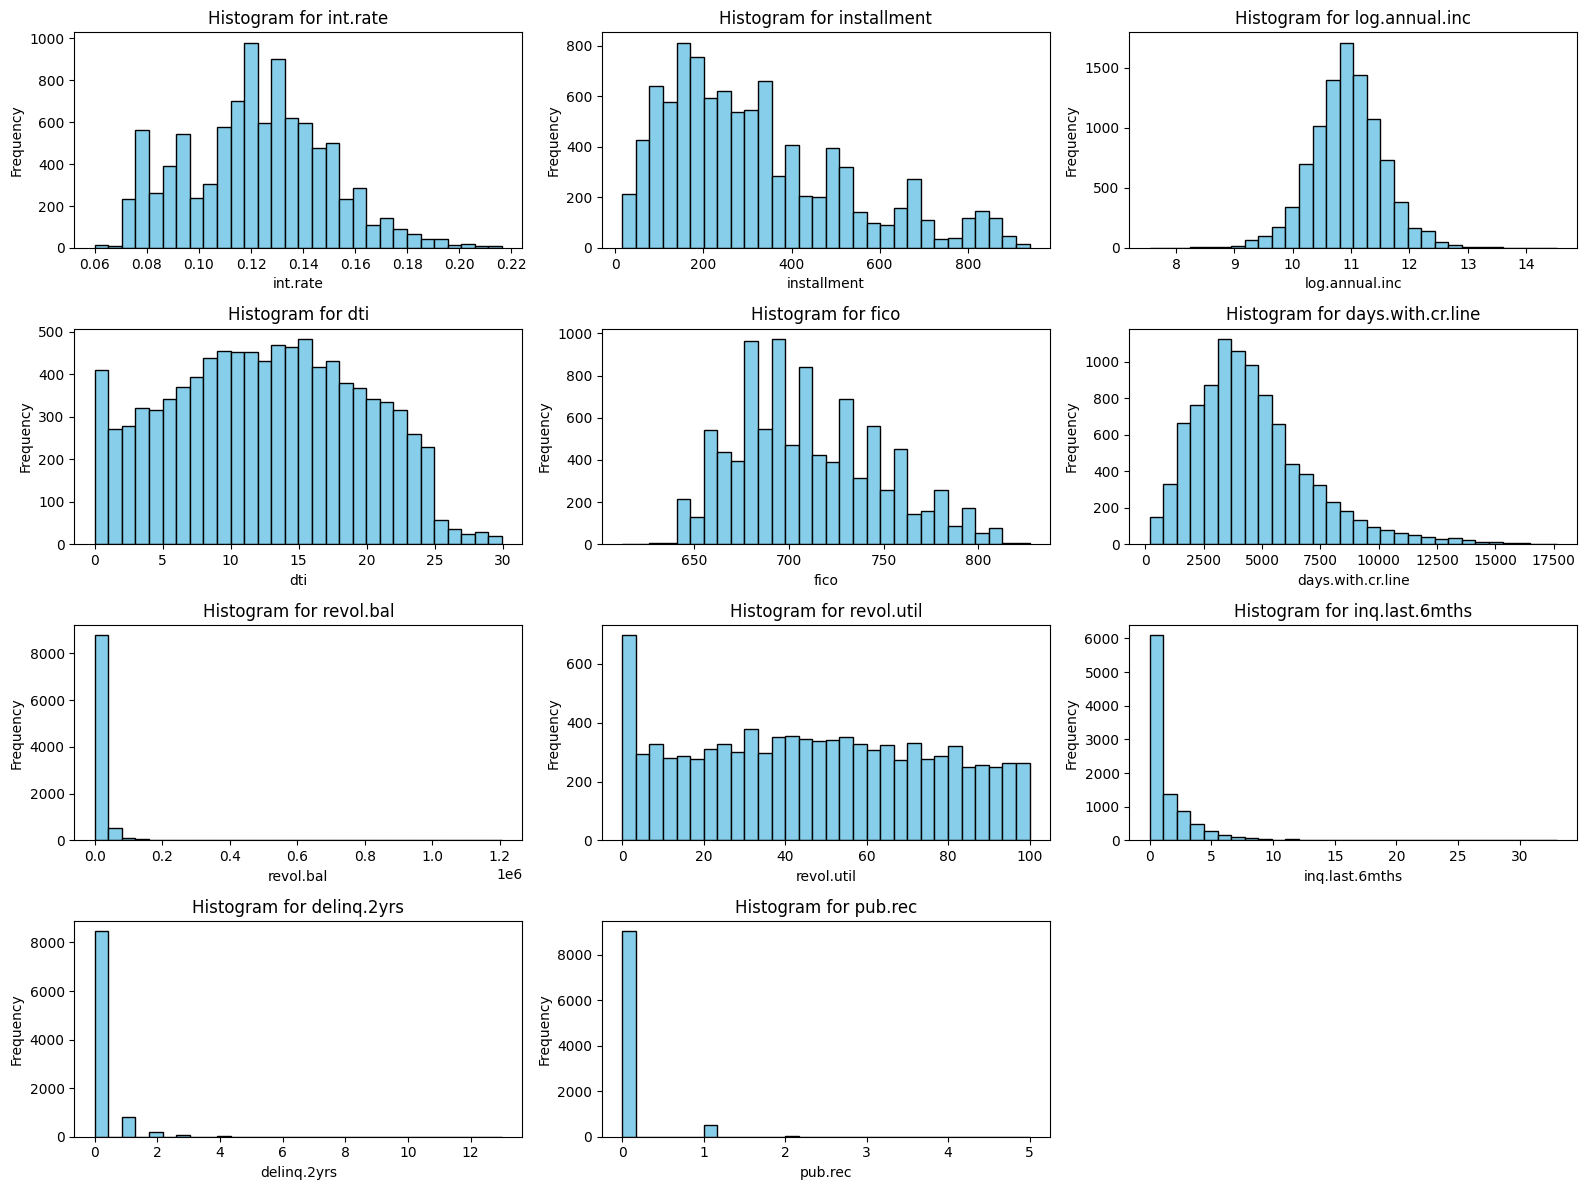

In [ ]:
numerical_features = df.select_dtypes(include=['int', 'float']).columns

# Membuat subplots untuk setiap atribut yang numerik
plt.figure(figsize=(16, 12))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 3, i)
    plt.hist(df[feature], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

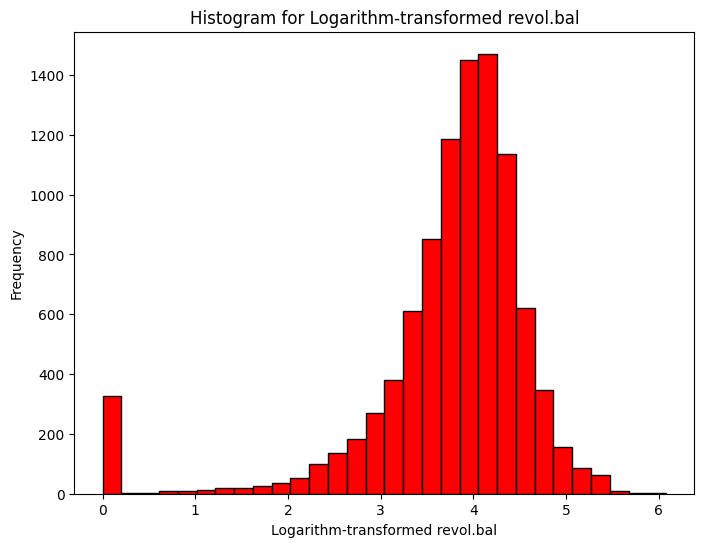

In [ ]:
df['log_revol.bal'] = df['revol.bal'].apply(lambda x: 0 if x <= 0 else np.log10(x))

plt.figure(figsize=(8, 6))
plt.hist(df['log_revol.bal'], bins=30, color='red', edgecolor='black')
plt.title('Histogram for Logarithm-transformed revol.bal')
plt.xlabel('Logarithm-transformed revol.bal')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df_noOutliers = df.copy()

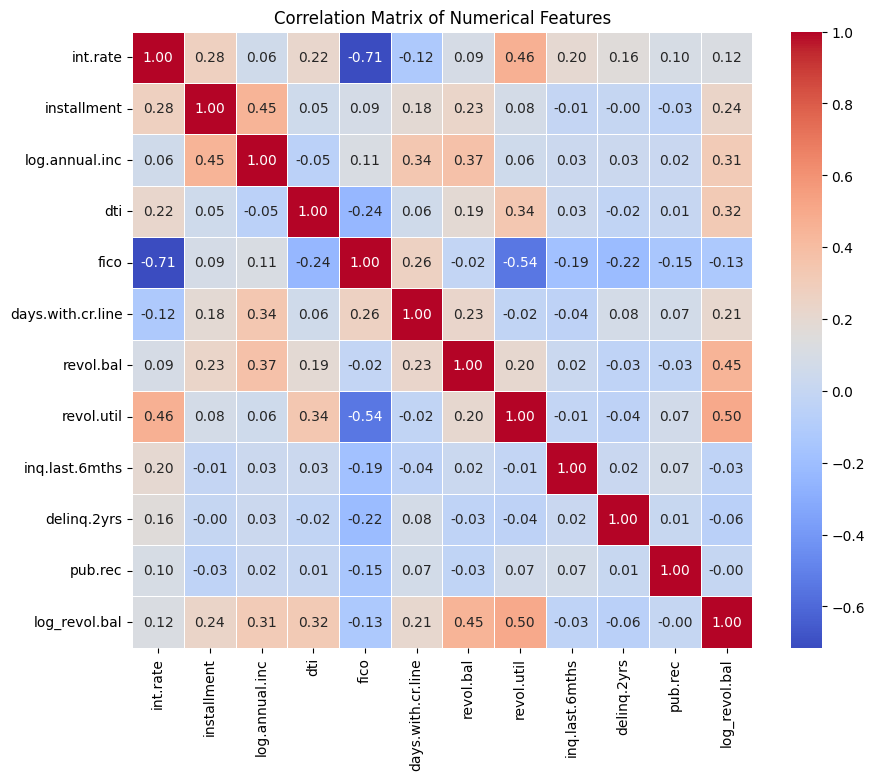

Spearman Correlation Test Results:
                                              int.rate  \
int.rate            Correlation: 1.00, p-value: 0.0000   
installment         Correlation: 0.24, p-value: 0.0000   
log.annual.inc      Correlation: 0.04, p-value: 0.0000   
dti                 Correlation: 0.22, p-value: 0.0000   
fico               Correlation: -0.74, p-value: 0.0000   
days.with.cr.line  Correlation: -0.13, p-value: 0.0000   
revol.bal           Correlation: 0.15, p-value: 0.0000   
revol.util          Correlation: 0.47, p-value: 0.0000   
inq.last.6mths      Correlation: 0.17, p-value: 0.0000   
delinq.2yrs         Correlation: 0.17, p-value: 0.0000   
pub.rec             Correlation: 0.09, p-value: 0.0000   
log_revol.bal       Correlation: 0.15, p-value: 0.0000   

                                           installment  \
int.rate            Correlation: 0.24, p-value: 0.0000   
installment         Correlation: 1.00, p-value: 0.0000   
log.annual.inc      Correlation: 0.4

In [ ]:
# pilih kolom yang tipe datanya numerik aja
numerical_features = df.select_dtypes(include=['int', 'float']).columns

# correlation matrix
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# spreaman
spearman_test_results = pd.DataFrame(index=numerical_features, columns=numerical_features)

for feature1 in numerical_features:
    for feature2 in numerical_features:
        correlation, p_value = spearmanr(df[feature1], df[feature2])
        spearman_test_results.loc[feature1, feature2] = f"Correlation: {correlation:.2f}, p-value: {p_value:.4f}"

print("Spearman Correlation Test Results:")
print(spearman_test_results)

In [ ]:
# Melakukan one-hot encoding untuk kolom 'purpose'
one_hot_encoded_purpose = pd.get_dummies(df['purpose'], prefix='purpose')

# Menggabungkan one-hot encoded kolom untuk DataFrame
df = pd.concat([df, one_hot_encoded_purpose], axis=1)

# Mengahapus kolom 'purpose' yang karena sudah tidak dibutuhkan
df.drop('purpose', axis=1, inplace=True)

# Menampilkan DataFrame yang sudah di update menjadi one-hot encoding
print(df.head())

   credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0           True    0.1189       829.10       11.350407  19.48   737   
1           True    0.1071       228.22       11.082143  14.29   707   
2           True    0.1357       366.86       10.373491  11.63   682   
3           True    0.1008       162.34       11.350407   8.10   712   
4           True    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  ...  \
0        5639.958333      28854        52.1               0  ...   
1        2760.000000      33623        76.7               0  ...   
2        4710.000000       3511        25.6               1  ...   
3        2699.958333      33667        73.2               1  ...   
4        4066.000000       4740        39.5               0  ...   

   delinq.2yrs_bin  pub.rec_bin  log_revol.bal purpose_all_other  \
0             bin1         bin1       4.460206                 0   
1             bin1    

In [ ]:
# Drop the {revol.bal, inq.last.6mths, delinq.2yrs, pub.rec} columns from the DataFrame
df.drop(['revol.bal', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec'], axis=1, inplace=True)

# Display the updated DataFrame
print(df.head())

   credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0           True    0.1189       829.10       11.350407  19.48   737   
1           True    0.1071       228.22       11.082143  14.29   707   
2           True    0.1357       366.86       10.373491  11.63   682   
3           True    0.1008       162.34       11.350407   8.10   712   
4           True    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.util  not.fully.paid inq.last.6mths_bin  \
0        5639.958333        52.1           False               bin1   
1        2760.000000        76.7           False               bin1   
2        4710.000000        25.6           False               bin2   
3        2699.958333        73.2           False               bin2   
4        4066.000000        39.5           False               bin1   

  delinq.2yrs_bin pub.rec_bin  log_revol.bal  purpose_all_other  \
0            bin1        bin1       4.460206                  0   
1     

In [ ]:
# Label Encoding
# Pilih kolom
categorical_columns_to_encode = ['inq.last.6mths_bin', 'delinq.2yrs_bin', 'pub.rec_bin']

# Declare
label_encoder = LabelEncoder()


# Apply di setiap kolom yang sudah di pilih
for column in categorical_columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Display
print(df.head())

   credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0           True    0.1189       829.10       11.350407  19.48   737   
1           True    0.1071       228.22       11.082143  14.29   707   
2           True    0.1357       366.86       10.373491  11.63   682   
3           True    0.1008       162.34       11.350407   8.10   712   
4           True    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.util  not.fully.paid  inq.last.6mths_bin  \
0        5639.958333        52.1           False                   0   
1        2760.000000        76.7           False                   0   
2        4710.000000        25.6           False                   1   
3        2699.958333        73.2           False                   1   
4        4066.000000        39.5           False                   0   

   delinq.2yrs_bin  pub.rec_bin  log_revol.bal  purpose_all_other  \
0                0            0       4.460206                  0

In [ ]:
for column in df.columns:
    # Periksa apakah nama kolom mengandung kata "purpose"
    if 'purpose' in column:
        # Ubah tipe data kolom menjadi boolean
        df[column] = df[column].astype(bool)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   bool   
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.util                  9578 non-null   float64
 8   not.fully.paid              9578 non-null   bool   
 9   inq.last.6mths_bin          9578 non-null   int64  
 10  delinq.2yrs_bin             9578 non-null   int64  
 11  pub.rec_bin                 9578 non-null   int64  
 12  log_revol.bal               9578 non-null   float64
 13  purpose_all_other           9578 

In [ ]:
# target/output yang diharapkan dikeluarkan mesin adalah 'not.fully.paid'
X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

# pisahkan dataset jadi 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets to verify the split
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (7662, 19)
X_test shape: (1916, 19)
y_train shape: (7662,)
y_test shape: (1916,)


In [ ]:
# pilih kolom yang numeric
numerical_columns = X_train.select_dtypes(include=['int64', 'float64'])
numerical_columns_test = X_test.select_dtypes(include=['int64', 'float64'])

# declare scaler
scaler = MinMaxScaler()

# fit dan transform scaler di data training
X_train[numerical_columns.columns] = scaler.fit_transform(numerical_columns)

# transform data
X_test[numerical_columns_test.columns] = scaler.transform(numerical_columns_test)

In [ ]:
X_train.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.util,inq.last.6mths_bin,delinq.2yrs_bin,pub.rec_bin,log_revol.bal,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
7317,True,0.549233,0.337220,0.368893,0.380841,0.372093,0.289749,0.288,0.333333,0.0,0.0,0.361012,False,False,False,False,False,True,False
350,True,0.152174,0.238699,0.554490,0.202270,0.604651,0.170047,0.404,0.000000,0.0,0.0,0.607504,False,True,False,False,False,False,False
5206,True,0.350384,0.132833,0.546227,0.227971,0.488372,0.207902,0.721,0.333333,0.0,0.0,0.682135,False,False,True,False,False,False,False
2673,True,0.212276,0.553247,0.529405,0.278705,0.558140,0.223364,0.852,0.000000,0.0,0.0,0.773157,True,False,False,False,False,False,False
3528,True,0.336317,0.320768,0.474305,0.635514,0.674419,0.393468,0.047,0.333333,0.0,0.0,0.422561,False,False,False,False,False,True,False


In [ ]:
X_test.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.util,inq.last.6mths_bin,delinq.2yrs_bin,pub.rec_bin,log_revol.bal,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
8558,False,0.604220,0.473623,0.459716,0.484646,0.209302,0.207902,0.822,0.666667,0.0,0.0,0.657626,False,False,True,False,False,False,False
4629,True,0.372762,0.560094,0.544088,0.363485,0.558140,0.195875,0.409,0.666667,0.0,0.0,0.702926,False,False,True,False,False,False,False
1383,True,0.349105,0.196956,0.422255,0.458278,0.372093,0.108243,0.858,0.000000,0.0,0.0,0.694285,False,True,False,False,False,False,False
8142,False,0.668798,0.097883,0.520847,0.939920,0.279070,0.360826,0.258,0.666667,0.5,0.0,0.651427,True,False,False,False,False,False,False
1768,True,0.397059,0.156035,0.539727,0.133178,0.418605,0.278349,0.072,0.333333,0.5,0.0,0.446631,True,False,False,False,False,False,False


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print(f"{name}:\n {classification_report(y_test, y_pred)}")
    print("-------------------------------")

Model: Logistic Regression
Accuracy: 0.8408
Precision: 0.5000
Recall: 0.0197
F1 Score: 0.0379
ROC AUC Score: 0.7049
Logistic Regression:
               precision    recall  f1-score   support

       False       0.84      1.00      0.91      1611
        True       0.50      0.02      0.04       305

    accuracy                           0.84      1916
   macro avg       0.67      0.51      0.48      1916
weighted avg       0.79      0.84      0.77      1916

-------------------------------
Model: Random Forest
Accuracy: 0.8398
Precision: 0.4375
Recall: 0.0230
F1 Score: 0.0436
ROC AUC Score: 0.6692
Random Forest:
               precision    recall  f1-score   support

       False       0.84      0.99      0.91      1611
        True       0.44      0.02      0.04       305

    accuracy                           0.84      1916
   macro avg       0.64      0.51      0.48      1916
weighted avg       0.78      0.84      0.77      1916

-------------------------------
Model: XGBoost
Acc

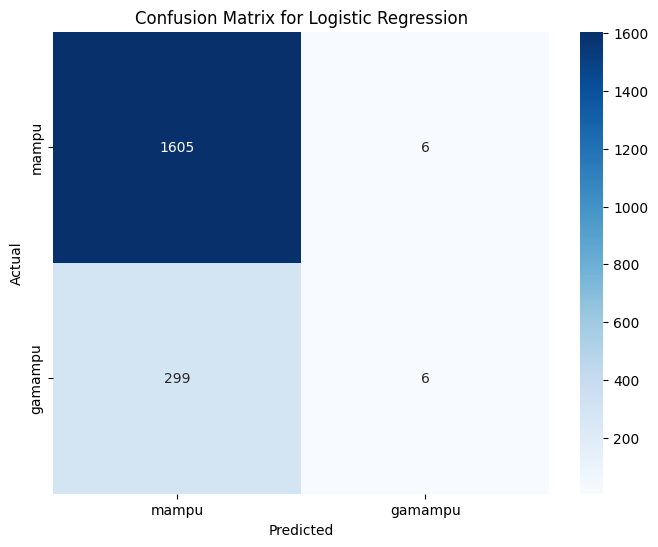

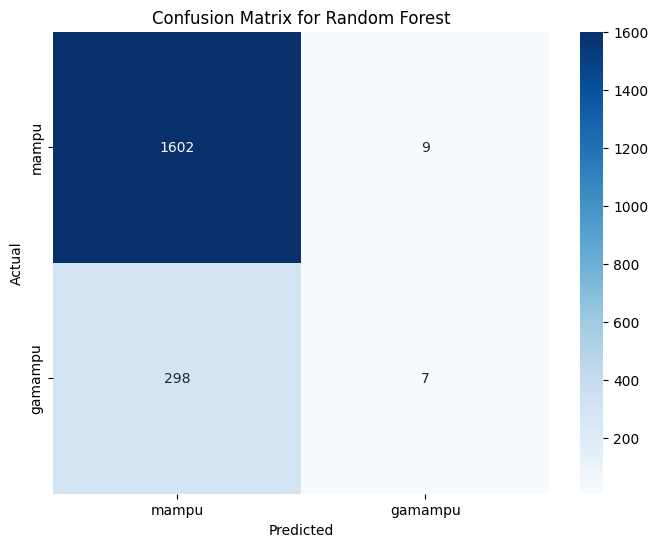

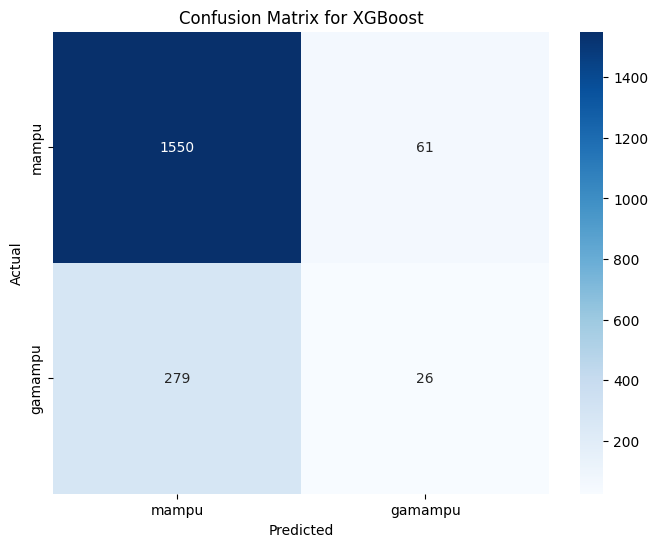

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
# membuat confusion matrix
    cm = confusion_matrix(y_test, y_pred)
# buat plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['mampu', 'gamampu'],
                yticklabels=['mampu', 'gamampu'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Menginisialisasi dan melatih model
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    # Mengevaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    # menampilkan evaluation metrics
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print(f"{name}:\n {classification_report(y_test, y_pred)}")
    print("-----------------------------")

Model: Logistic Regression
Accuracy: 0.6388
Precision: 0.2566
Recall: 0.6689
F1 Score: 0.3709
ROC AUC Score: 0.7011
Logistic Regression:
               precision    recall  f1-score   support

       False       0.91      0.63      0.75      1611
        True       0.26      0.67      0.37       305

    accuracy                           0.64      1916
   macro avg       0.58      0.65      0.56      1916
weighted avg       0.81      0.64      0.69      1916

-----------------------------
Model: Random Forest
Accuracy: 0.7855
Precision: 0.2591
Recall: 0.1869
F1 Score: 0.2171
ROC AUC Score: 0.6636
Random Forest:
               precision    recall  f1-score   support

       False       0.85      0.90      0.88      1611
        True       0.26      0.19      0.22       305

    accuracy                           0.79      1916
   macro avg       0.56      0.54      0.55      1916
weighted avg       0.76      0.79      0.77      1916

-----------------------------
Model: XGBoost
Accurac

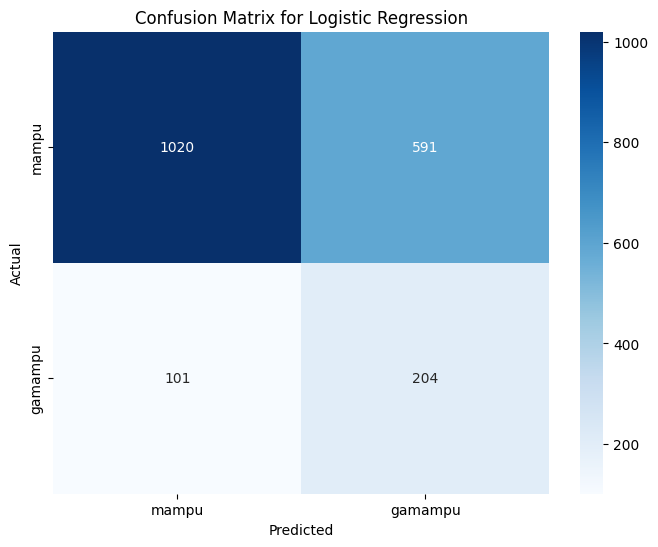

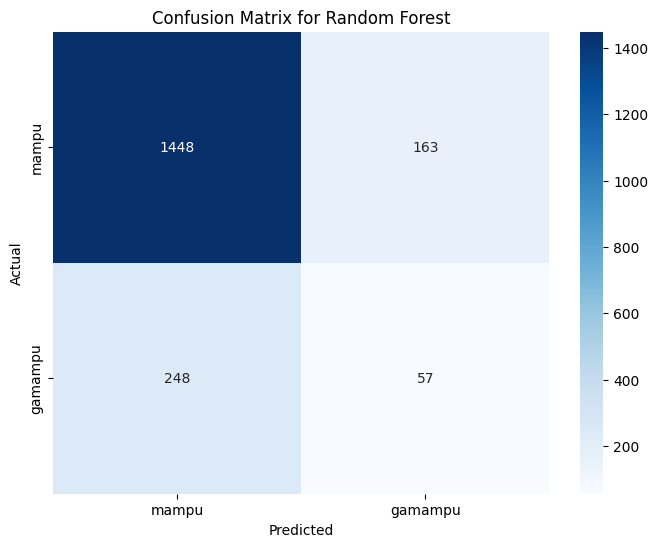

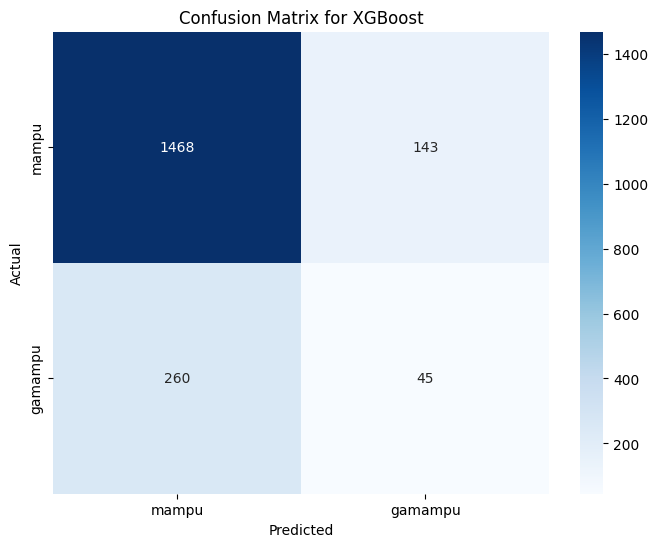

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
  #  membuat confusion matrix
    cm = confusion_matrix(y_test, y_pred)
# buat heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['mampu', 'gamampu'],
                yticklabels=['mampu', 'gamampu'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(20, 100, num = 5)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf1 = RandomForestClassifier()
rf2 = RandomizedSearchCV(estimator = rf1, param_distributions = random_grid,
                              cv = 3, verbose=2,n_jobs = -1, random_state=42)
rf2.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [20, 40, 60, 80, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=42, verbose=2)

In [ ]:
rf2.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': True}

In [ ]:
rf3=RandomForestClassifier(n_estimators= 200,
 min_samples_split= 10,
 min_samples_leaf=4,
 max_features='auto',
 max_depth=40,
 bootstrap=True)
rf3.fit(X_train,y_train)
predsrf2=rf3.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

       False       0.84      1.00      0.91      1611
        True       0.67      0.01      0.03       305

    accuracy                           0.84      1916
   macro avg       0.75      0.51      0.47      1916
weighted avg       0.81      0.84      0.77      1916



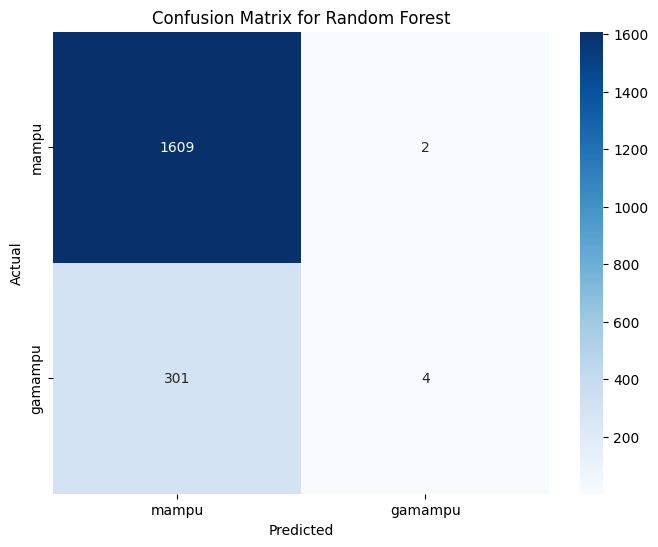

In [ ]:
print(classification_report(y_test,predsrf2))
cm = confusion_matrix(y_test, predsrf2)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['mampu', 'gamampu'],
            yticklabels=['mampu', 'gamampu'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for Random Forest')
plt.show()

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(20, 100, num = 5)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

xg1 = RandomForestClassifier()
xg2 = RandomizedSearchCV(estimator = rf1, param_distributions = random_grid,
                              cv = 3, verbose=2,n_jobs = -1, random_state=42)
xg2.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [20, 40, 60, 80, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=42, verbose=2)

In [ ]:
xg2.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': True}

In [ ]:
xg2=XGBClassifier(n_estimators= 200,
  min_samples_split= 2,
  min_samples_leaf=2,
  max_features='auto',
  max_depth=80,
  random_state=42,
  bootstrap=True)
xg2.fit(X_train,y_train)
predxg2=xg2.predict(X_test)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:59:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

       False       0.85      0.97      0.91      1611
        True       0.40      0.10      0.16       305

    accuracy                           0.83      1916
   macro avg       0.63      0.54      0.53      1916
weighted avg       0.78      0.83      0.79      1916



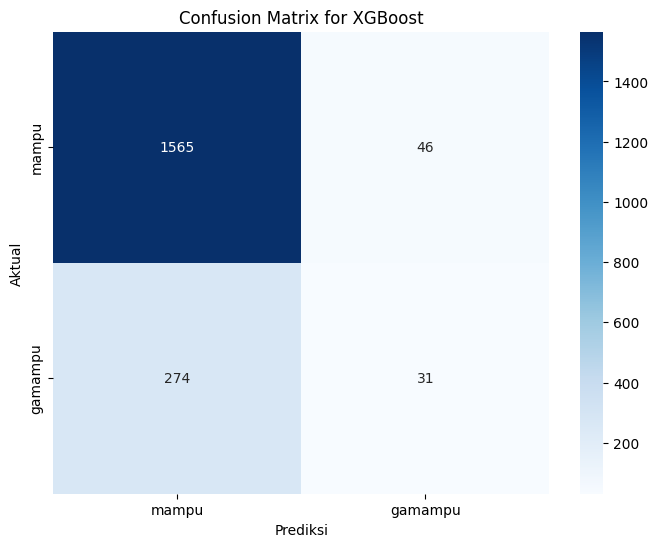

In [ ]:
print(classification_report(y_test,predxg2))

cm = confusion_matrix(y_test, predxg2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['mampu', 'gamampu'],
            yticklabels=['mampu', 'gamampu'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix for XGBoost')
plt.show()

In [ ]:
random_grid = {
    'C': uniform(loc=0, scale=4),  # Distribusi uniform untuk C
    'penalty': ['l1', 'l2']        # Pilihan penalty
}

lr = LogisticRegression()

# Membuat instance dari RandomizedSearchCV
lr_random = RandomizedSearchCV(estimator=lr, param_distributions=random_grid,
                               n_iter=100, cv=3, verbose=2, random_state=42,
                               n_jobs=-1)

# Melatih model
lr_random.fit(X_train, y_train)

# Mendapatkan parameter terbaik
best_params = lr_random.best_params_
print("Parameter terbaik:", best_params)

# Membuat prediksi
preds_lr = lr_random.predict(X_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
129 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
129 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: So

Parameter terbaik: {'C': 0.7953696163552206, 'penalty': 'l2'}


              precision    recall  f1-score   support

       False       0.84      1.00      0.91      1611
        True       0.50      0.02      0.04       305

    accuracy                           0.84      1916
   macro avg       0.67      0.51      0.48      1916
weighted avg       0.79      0.84      0.77      1916



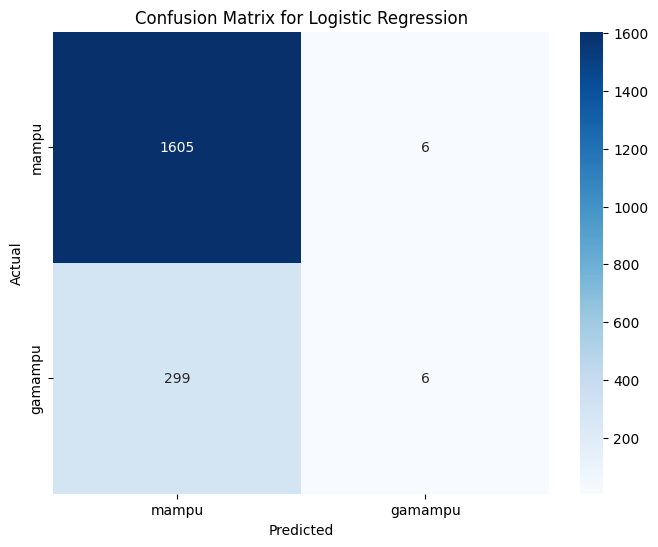

In [ ]:
print(classification_report(y_test,preds_lr))
cm = confusion_matrix(y_test, preds_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['mampu', 'gamampu'],
            yticklabels=['mampu', 'gamampu'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for Logistic Regression')
plt.show()